### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### Import dataset

In [2]:
df = pd.read_csv('Meteorite_Landings.csv')
df.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,Unnamed: 10
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)",NaN
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)",NaN
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)",NaN
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)",NaN
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)",NaN


### Details about the data

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass (g)     45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
 10  Unnamed: 10  0 non-null      float64
dtypes: float64(5), int64(1), object(5)
memory usage: 3.8+ MB


,id,mass (g),year,reclat,reclong,Unnamed: 10
count,45716.000000,4.558500e+04,45425.000000,38401.000000,38401.000000,0.0
mean,26889.735104,1.327808e+04,1991.828817,-39.122580,61.074319,NaN
std,16860.683030,5.749889e+05,25.052766,46.378511,80.647298,NaN
min,1.000000,0.000000e+00,860.000000,-87.366670,-165.433330,NaN
25%,12688.750000,7.200000e+00,1987.000000,-76.714240,0.000000,NaN
50%,24261.500000,3.260000e+01,1998.000000,-71.500000,35.666670,NaN
75%,40656.750000,2.026000e+02,2003.000000,0.000000,157.166670,NaN
max,57458.000000,6.000000e+07,2101.000000,81.166670,354.473330,NaN


In [4]:
print("Column Names:", df.columns.tolist())
rows, cols = df.shape

#Before Cleaning
print(f"The DataFrame has {rows} rows and {cols} columns.")

Column Names: ['name', 'id', 'nametype', 'recclass', 'mass (g)', 'fall', 'year', 'reclat', 'reclong', 'GeoLocation', 'Unnamed: 10']
The DataFrame has 45716 rows and 11 columns.


In [5]:
from plotly import io

io.renderers.default = 'iframe'
px.bar(data_frame=df['recclass'].value_counts().to_frame().reset_index().head(n=40), x='recclass', y='count')

### Group recclass and fall for Q1

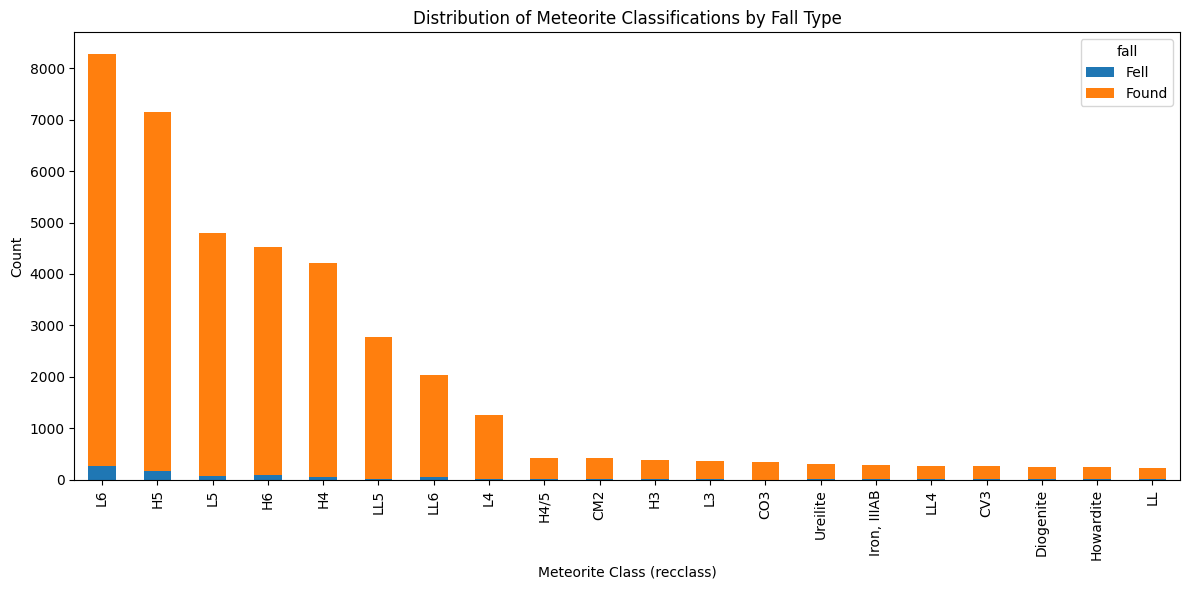

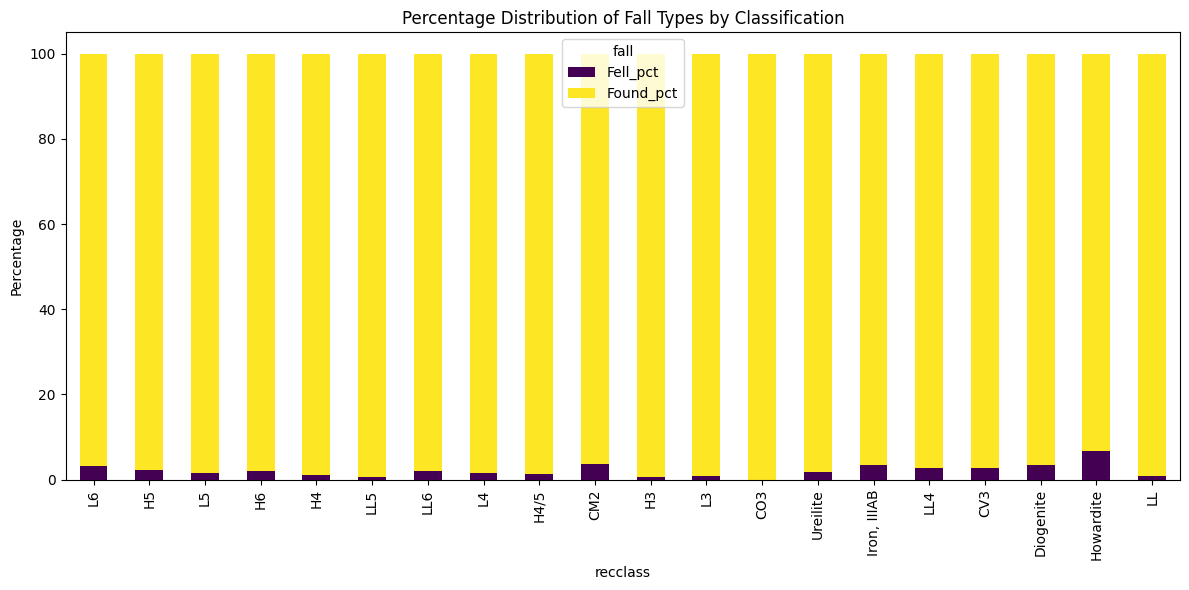

In [6]:
# Group recclass and fall
recclass_fall_counts = df.groupby(['recclass', 'fall']).size().reset_index(name='count')

recclass_pivot = recclass_fall_counts.pivot(index='recclass', columns='fall', values='count').fillna(0)

recclass_pivot['total'] = recclass_pivot.sum(axis=1)
recclass_pivot = recclass_pivot.sort_values(by='total', ascending=False)

#show first 20 only because it will be too much or and messy to show all
recclass_pivot.head(20)[['Fell', 'Found']].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribution of Meteorite Classifications by Fall Type')
plt.xlabel('Meteorite Class (recclass)')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#Percentage comparison
recclass_pivot['Fell_pct'] = recclass_pivot['Fell'] / recclass_pivot['total'] * 100
recclass_pivot['Found_pct'] = recclass_pivot['Found'] / recclass_pivot['total'] * 100

recclass_pivot[['Fell_pct', 'Found_pct']].head(20).plot(kind='bar', stacked=True, figsize=(12,6), colormap='viridis')
plt.title('Percentage Distribution of Fall Types by Classification')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Interactive Figures for fun?

In [7]:
top20 = recclass_pivot.head(20).reset_index()
fig_bar = px.bar(top20, x='recclass', y=['Fell', 'Found'], 
             title='Top 20 Meteorite Classifications by Fall Type',
             labels={'value': 'Count', 'recclass': 'Classification'}, 
             barmode='stack')
fig_bar.show()

In [8]:


fig_tree = px.treemap(recclass_fall_counts[recclass_fall_counts['recclass'].isin(top20['recclass'])],
                 path=['fall', 'recclass'],
                 values='count',
                 title='Treemap of Meteorite Classifications by Fall Type')
fig_tree.show()


## Data Cleaning and Preprocessing

In [9]:
# Check for missing values
df.isnull().sum()

name               0
id                 0
nametype           0
recclass           0
mass (g)         131
fall               0
year             291
reclat          7315
reclong         7315
GeoLocation     7315
Unnamed: 10    45716
dtype: int64

In [10]:
# Drop the 'Unnamed: 10' column, seems all the row's are missing values
df.drop(columns=['Unnamed: 10'], inplace=True)

# Handling missing values
df = df.dropna(subset=['mass (g)', 'year', 'reclat', 'reclong'])

df

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.78917, 41.5046)"


In [11]:
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38115 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         38115 non-null  object 
 1   id           38115 non-null  int64  
 2   nametype     38115 non-null  object 
 3   recclass     38115 non-null  object 
 4   mass (g)     38115 non-null  float64
 5   fall         38115 non-null  object 
 6   year         38115 non-null  float64
 7   reclat       38115 non-null  float64
 8   reclong      38115 non-null  float64
 9   GeoLocation  38115 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.2+ MB


In [12]:
# After cleaning
af_rows, af_cols = df.shape

# DataFrame shape before and after cleaning
print("DataFrame Shape Summary")
print("-" * 30)
print(f"Before Cleaning : {rows:,} rows × {cols:,} columns")
print(f"After Cleaning  : {af_rows:,} rows × {af_cols:,} columns")


DataFrame Shape Summary
------------------------------
Before Cleaning : 45,716 rows × 11 columns
After Cleaning  : 38,115 rows × 10 columns


### Convert 'year' to datetime

In [13]:
# Convert 'year' to datetime
print(f"Before Conversion: {df['year'].dtype}")

# Convert 'year' to datetime
df['year'] = pd.to_datetime(df['year'], format='%Y', errors='coerce')
print(f"After Conversion : {df['year'].dtype}")

Before Conversion: float64
After Conversion : datetime64[ns]


### Convert 'fall' column to binary encoding

In [14]:
df['fall'] = df['fall'].str.strip().str.capitalize()
print(df['fall'].unique())

df['fall'] = df['fall'].map({'Fell': 1, 'Found': 0})
#checking values correctness after conversion
print(df['fall'])
print(f"After Conversion : {df['fall'].isnull().sum()}")

['Fell' 'Found']
0        1
1        1
2        1
3        1
4        1
        ..
45711    0
45712    0
45713    0
45714    0
45715    0
Name: fall, Length: 38115, dtype: int64
After Conversion : 0


In [15]:
# Display the cleaned data
df

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,1,1880-01-01,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,1,1951-01-01,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,1,1952-01-01,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,1,1976-01-01,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,1,1902-01-01,-33.16667,-64.95000,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,0,1990-01-01,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,0,1999-01-01,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,0,1939-01-01,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,0,2003-01-01,49.78917,41.50460,"(49.78917, 41.5046)"


## Exploratory Data Analysis (EDA)

In [16]:
print(df['nametype'].value_counts())
print("-" * 30)
print(df['fall'].value_counts())  # 'Fell' vs 'Found'


nametype
Valid     38094
Relict       21
Name: count, dtype: int64
------------------------------
fall
0    37050
1     1065
Name: count, dtype: int64


### Univariate Analysis

#### Fell vs Found Comparison

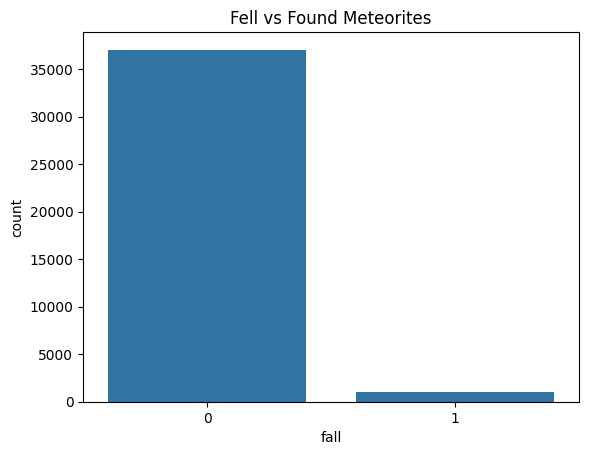

In [17]:
# Count plot for fall status
sns.countplot(x='fall', data=df)
plt.title("Fell vs Found Meteorites")
plt.show()

#### Histogram for mass (g)

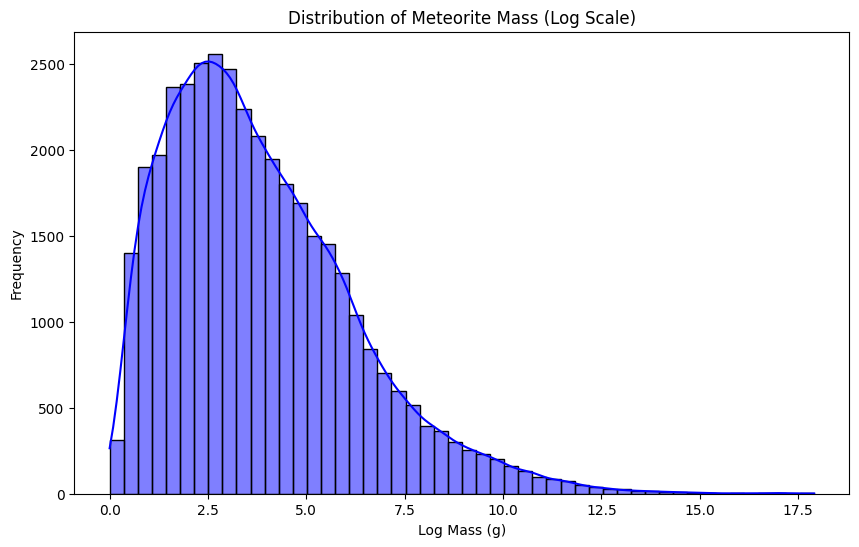

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(df['mass (g)']), bins=50, kde=True, color='blue')
plt.xlabel('Log Mass (g)')
plt.ylabel('Frequency')
plt.title('Distribution of Meteorite Mass (Log Scale)')
plt.show()

In [19]:
# Create an interactive map
fig = px.scatter_geo(df,
                     lon='reclong',
                     lat='reclat',
                     color='fall',
                     hover_name='name',
                     hover_data=['mass (g)', 'recclass'],
                     projection='natural earth',
                     title='Meteorite Falls vs Found Map')

# Update layout
fig.update_geos(showcountries=True, showland=True, landcolor="lightgray", showocean=True, oceancolor="lightblue")
fig.update_layout(height=600, margin={"r": 0, "t": 30, "l": 0, "b": 0})

# Show the map
fig.show()

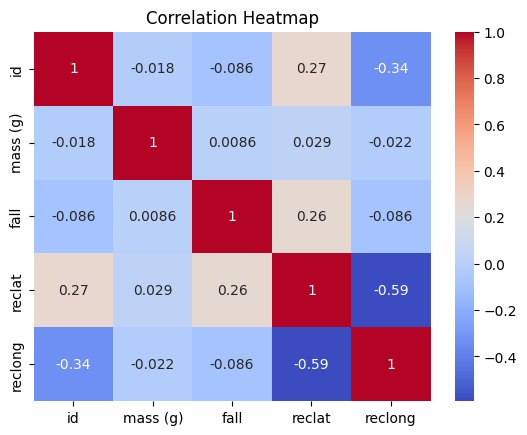

                id  mass (g)      fall    reclat   reclong
id        1.000000 -0.017916 -0.086009  0.267175 -0.335238
mass (g) -0.017916  1.000000  0.008604  0.029235 -0.021854
fall     -0.086009  0.008604  1.000000  0.255963 -0.086060
reclat    0.267175  0.029235  0.255963  1.000000 -0.593234
reclong  -0.335238 -0.021854 -0.086060 -0.593234  1.000000


In [20]:
# Visualize the correlation between numeric features
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
print(correlation_matrix)

In [32]:
# Convert 'year' to datetime and extract year as integer
df['year'] = pd.to_datetime(df['year'], errors='coerce')
df['year_int'] = df['year'].dt.year

# Filter using the integer year
df_recent = df[(df['year_int'] > 1970) & (df['year_int'] < 2025)]

# Now plot with Plotly
import plotly.express as px

fig = px.scatter_mapbox(
    data_frame=df_recent,
    lat='reclat',
    lon='reclong',
    color='year_int',              # or use 'year' if you prefer a datetime color scale
    size='mass (g)',
    size_max=15,
    hover_name='name',
    hover_data={
        'recclass': True,
        'mass (g)': True,
        'year_int': True
    },
    mapbox_style='carto-darkmatter',
    zoom=1,
    center={'lat': 0, 'lon': 0},
    title="Meteorite Falls (1970 - 2024) Visualized on Map",
    height=800,
    color_continuous_scale='Viridis'
)

fig.show()

C:\Users\tiagrajah.MYAGR-LPWIN-072\AppData\Local\Temp\ipykernel_29844\4240940498.py:11: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [22]:
print("Hello")

Hello


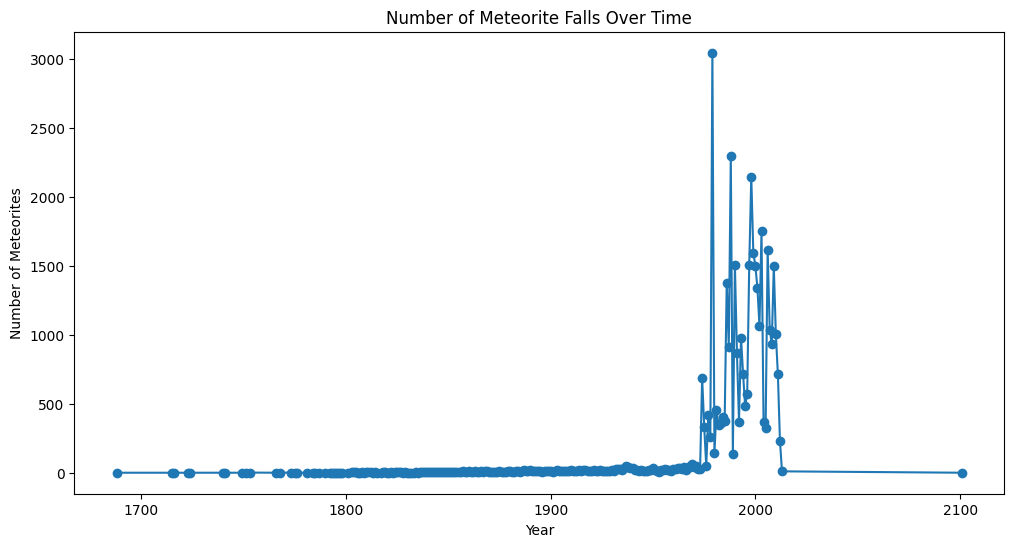

In [23]:
falls_over_time = df.groupby(df['year'].dt.year).size()

plt.figure(figsize=(12, 6))
plt.plot(falls_over_time.index, falls_over_time.values, marker='o')
plt.title('Number of Meteorite Falls Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Meteorites')
# plt.tight_layout()
plt.show()

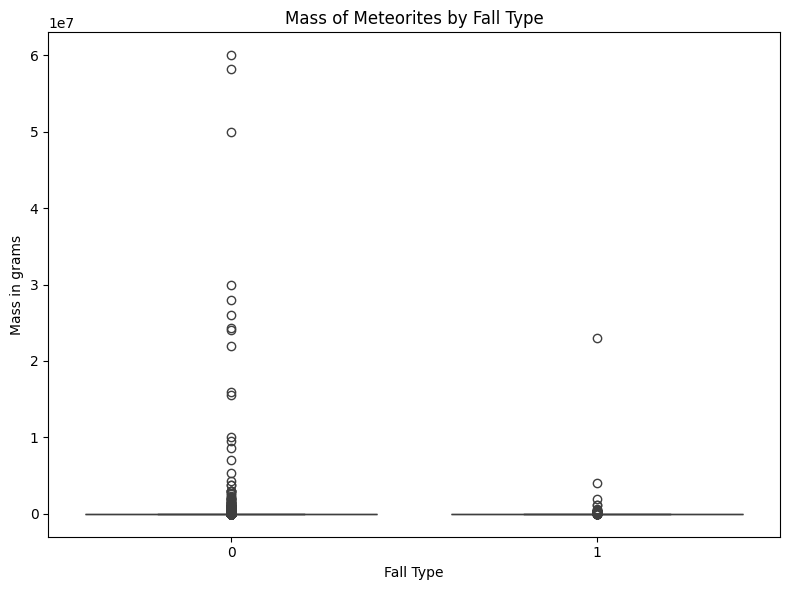

In [24]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='fall', y='mass (g)', data=df)
plt.title('Mass of Meteorites by Fall Type')
plt.xlabel('Fall Type')
plt.ylabel('Mass in grams')
plt.tight_layout()
plt.show()

### Trying smtg for Q2

In [25]:
mass_bins = [0, 1000, 10000, 50000, df['mass (g)'].max()]
bin_labels = ['Small', 'Medium', 'Large', 'Very Large']

# Im creating a new column here based on the bins
df['mass_category'] = pd.cut(df['mass (g)'], bins=mass_bins, labels=bin_labels, include_lowest=True) 
#df['mass_category'].head(20) #checking values

fig = px.scatter_mapbox(
    df,
    lat='reclat',
    lon='reclong',
    color='mass_category', 
    size='mass (g)',
    size_max=20,
    mapbox_style='carto-positron',
    title='Meteorite Locations by Mass Category',
    zoom=1,
    height=700,
    hover_name='name',
    hover_data=['mass (g)', 'recclass'],
    category_orders={
        'mass_category': ['Small', 'Medium', 'Large', 'Very Large']  # 👈 desired order
    }
)
fig.show()

C:\Users\tiagrajah.MYAGR-LPWIN-072\AppData\Local\Temp\ipykernel_29844\1330493566.py:8: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



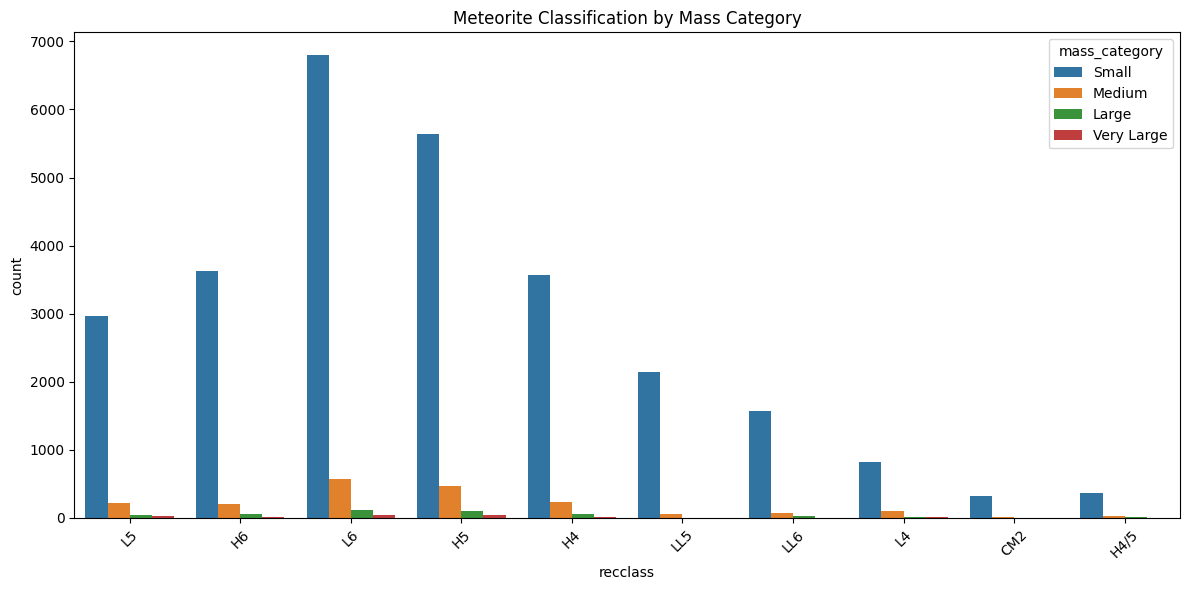

In [26]:
top_classes = df['recclass'].value_counts().nlargest(10).index
df_top = df[df['recclass'].isin(top_classes)]

plt.figure(figsize=(12, 6))
sns.countplot(data=df_top, x='recclass', hue='mass_category')  # or mass_quartile
plt.title('Meteorite Classification by Mass Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Question 4: How accurately can classification models predict whether a meteorite fell or was found, using its mass, classification type, and geographic coordinates as input features?

# Predicting Meteorite Origin: Classification Models

## Objective
**Question**: How accurately can classification models predict whether a meteorite **fell** or was **found**, using its:
- `mass (g)`
- `classification type` (`recclass`)
- `geographic coordinates` (`reclat`, `reclong`)

The goal is to apply and compare different classification algorithms to determine which model best predicts the fall status (`fall` column) of meteorites.

We will explore the following models:
1. **Logistic Regression**
2. **Random Forest Classifier**
3. **Support Vector Machine (SVM)**

Each model will be evaluated using:
- Confusion Matrix
- Classification Report (Precision, Recall, F1-score)
- Visualizations


### Machine Learning Model

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,classification_report


# Drop irrelevant columns
df = df[['mass (g)', 'recclass', 'reclat', 'reclong', 'fall']].dropna()

# Encode categorical feature
df['recclass'] = LabelEncoder().fit_transform(df['recclass'])

# Features and target
X = df[['mass (g)', 'recclass', 'reclat', 'reclong']]
y = df['fall']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#### Logistic Regression

In [71]:
# Train Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

# Predict
lr_pred = lr_model.predict(X_test_scaled)

# Save classification report
lr_report = classification_report(y_test, lr_pred, target_names=["Found", "Fell"], output_dict=True)

# Confusion Matrix
lr_cm = confusion_matrix(y_test, lr_pred)
lr_cm_df = pd.DataFrame(lr_cm, index=['Actual: Found (0)', 'Actual: Fell (1)'],
                                   columns=['Predicted: Found (0)', 'Predicted: Fell (1)'])

# Print results
print("📘 Logistic Regression Confusion Matrix:")
print(lr_cm_df)
print("\n📊 Classification Report:")
print(classification_report(y_test, lr_pred, target_names=["Found", "Fell"]))

📘 Logistic Regression Confusion Matrix:
                   Predicted: Found (0)  Predicted: Fell (1)
Actual: Found (0)                 11100                   13
Actual: Fell (1)                    313                    9

📊 Classification Report:
              precision    recall  f1-score   support

       Found       0.97      1.00      0.99     11113
        Fell       0.41      0.03      0.05       322

    accuracy                           0.97     11435
   macro avg       0.69      0.51      0.52     11435
weighted avg       0.96      0.97      0.96     11435



# Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_scaled, y_train)

# Predict
rf_pred = rf_model.predict(X_test_scaled)

# Save classification report for later comparison
rf_report = classification_report(y_test, rf_pred, target_names=["Found", "Fell"], output_dict=True)

# Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_pred)
rf_cm_df = pd.DataFrame(rf_cm, index=['Actual: Found (0)', 'Actual: Fell (1)'],
                                  columns=['Predicted: Found (0)', 'Predicted: Fell (1)'])

# Print results
print("🌳 Random Forest Confusion Matrix:")
print(rf_cm_df)
print("\n📊 Classification Report:")
print(classification_report(y_test, rf_pred, target_names=["Found", "Fell"]))


🌳 Random Forest Confusion Matrix:
                   Predicted: Found (0)  Predicted: Fell (1)
Actual: Found (0)                 11066                   47
Actual: Fell (1)                     88                  234

📊 Classification Report:
              precision    recall  f1-score   support

       Found       0.99      1.00      0.99     11113
        Fell       0.83      0.73      0.78       322

    accuracy                           0.99     11435
   macro avg       0.91      0.86      0.89     11435
weighted avg       0.99      0.99      0.99     11435



# SVM

In [72]:
# Train SVM model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predict
svm_pred = svm_model.predict(X_test_scaled)

# Save classification report
svm_report = classification_report(y_test, svm_pred, target_names=["Found", "Fell"], output_dict=True)

# Confusion Matrix
svm_cm = confusion_matrix(y_test, svm_pred)
svm_cm_df = pd.DataFrame(svm_cm, index=['Actual: Found (0)', 'Actual: Fell (1)'],
                                     columns=['Predicted: Found (0)', 'Predicted: Fell (1)'])

# Print results
print("🔲 SVM Confusion Matrix:")
print(svm_cm_df)
print("\n📊 Classification Report:")
print(classification_report(y_test, svm_pred, target_names=["Found", "Fell"]))

🔲 SVM Confusion Matrix:
                   Predicted: Found (0)  Predicted: Fell (1)
Actual: Found (0)                 11088                   25
Actual: Fell (1)                    252                   70

📊 Classification Report:
              precision    recall  f1-score   support

       Found       0.98      1.00      0.99     11113
        Fell       0.74      0.22      0.34       322

    accuracy                           0.98     11435
   macro avg       0.86      0.61      0.66     11435
weighted avg       0.97      0.98      0.97     11435



### Visual Comparison of Confusion Matrices

Below are the confusion matrices for the three models. Logistic Regression, Random Forest, and SVM. These matrices visually represent how well each model performed in classifying the meteorites as "Found" or "Fell".

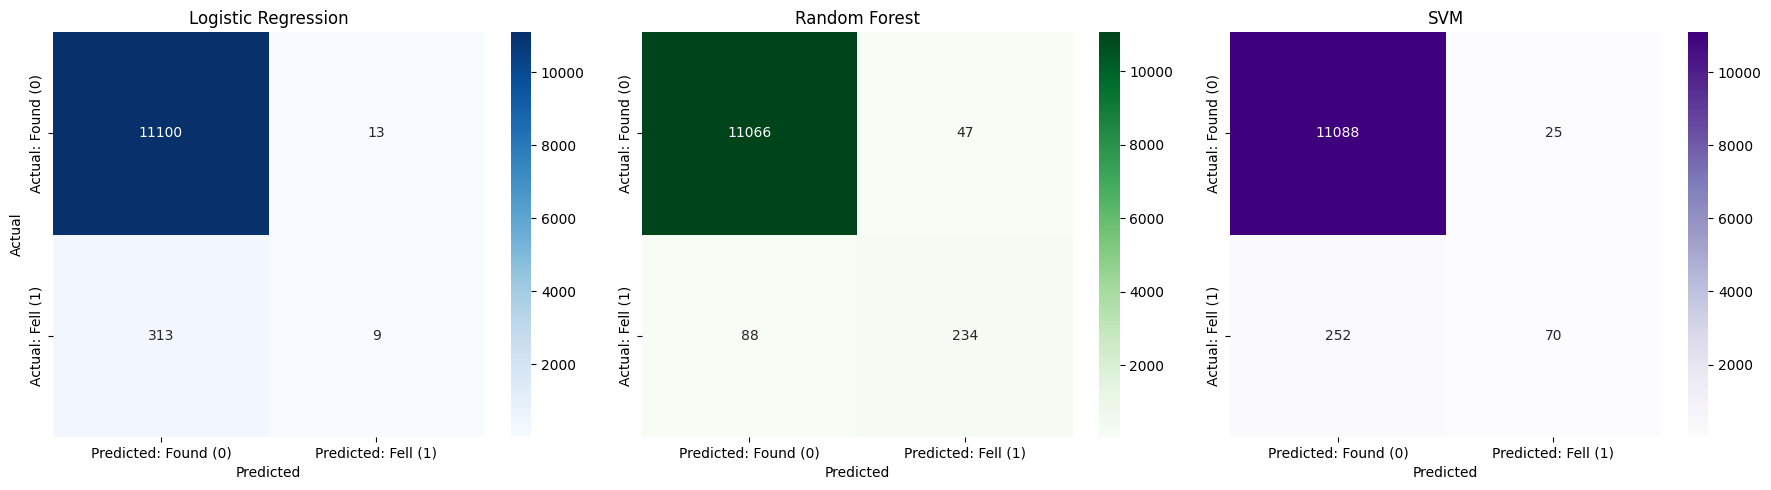

In [75]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Logistic Regression
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Logistic Regression")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Random Forest
sns.heatmap(rf_cm_df, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Random Forest")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("")

# SVM
sns.heatmap(svm_cm_df, annot=True, fmt='d', cmap='Purples', ax=axes[2])
axes[2].set_title("SVM")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("")

plt.tight_layout()
plt.show()

In [74]:
comparison_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "SVM"],
    "Accuracy": [lr_report['accuracy'], rf_report['accuracy'], svm_report['accuracy']],
    "Precision (Fell)": [lr_report['Fell']['precision'], rf_report['Fell']['precision'], svm_report['Fell']['precision']],
    "Recall (Fell)": [lr_report['Fell']['recall'], rf_report['Fell']['recall'], svm_report['Fell']['recall']],
    "F1-Score (Fell)": [lr_report['Fell']['f1-score'], rf_report['Fell']['f1-score'], svm_report['Fell']['f1-score']]
})

comparison_df.set_index("Model", inplace=True)
comparison_df = comparison_df.round(3)
display(comparison_df)

,Accuracy,Precision (Fell),Recall (Fell),F1-Score (Fell)
Model,,,,
Logistic Regression,0.971,0.409,0.028,0.052
Random Forest,0.988,0.833,0.727,0.776
SVM,0.976,0.737,0.217,0.336


### Interpretation:

- **Logistic Regression** shows high overall accuracy but fails to capture "Fell" cases — very low recall and F1-score.
- **SVM** improves on logistic regression but still underperforms in recall for the "Fell" class.
- **Random Forest** clearly outperforms the others in all metrics related to the minority class ("Fell").

---

### Final Verdict:
**Random Forest Classifier** is the best model for this classification task. It balances precision and recall effectively, especially for the underrepresented class, and delivers the most robust results.
